In [1]:
#Import the Packages
import pandas as pd
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

nltk.download("popular")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data] 

True

In [3]:
# Load data file
data = pd.read_csv('/content/sample_data/Corona_NLP_test.csv')

In [4]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


Clean the data

In [5]:
#Check for nulll values
data.isnull().sum()


UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

Since this is sentimental analysis,the sentimental column has no null values.

In [7]:
#Check for duplicate values
data.duplicated().sum()

0

No duplicate values

In [8]:
data.to_csv('cleanData.csv',index=False)

Remove punctuation fron the tweet data

In [10]:
print(data['OriginalTweet']);

0       TRENDING New Yorkers encounter empty supermark...
1       When I couldnt find hand sanitizer at Fred Mey...
2       Find out how you can protect yourself and love...
3       Panic buying hits NewYork City as anxious shop...
4       toiletpaper dunnypaper coronavirus coronavirus...
                              ...                        
3793    Meanwhile In A Supermarket in Israel  People d...
3794    Did you panic buy a lot of nonperishable items...
3795    Asst Prof of Economics cconces was on NBCPhila...
3796    Gov need to do somethings instead of biar je r...
3797    I and ForestandPaper members are committed to ...
Name: OriginalTweet, Length: 3798, dtype: object


In [13]:
#Remove punctuation from the tweet data
import string
punctuations = string.punctuation
data['OriginalTweet'] = data['OriginalTweet'].apply(lambda x: ''.join([char for char in x if char not in punctuations]).lower())


In [14]:
print(data['OriginalTweet']);

0       trending new yorkers encounter empty supermark...
1       when i couldnt find hand sanitizer at fred mey...
2       find out how you can protect yourself and love...
3       panic buying hits newyork city as anxious shop...
4       toiletpaper dunnypaper coronavirus coronavirus...
                              ...                        
3793    meanwhile in a supermarket in israel  people d...
3794    did you panic buy a lot of nonperishable items...
3795    asst prof of economics cconces was on nbcphila...
3796    gov need to do somethings instead of biar je r...
3797    i and forestandpaper members are committed to ...
Name: OriginalTweet, Length: 3798, dtype: object


**a.Convert the text corpus into tokens**

In [15]:
tokenized_corpus = []
for tweet in data['OriginalTweet']:
    tokens = nltk.word_tokenize(tweet)
    tokenized_corpus.append(tokens)

# Print the first 10 tokens from the first tweet
print(tokenized_corpus[0][:10])

['trending', 'new', 'yorkers', 'encounter', 'empty', 'supermarket', 'shelves', 'pictured', 'wegmans', 'in']


In [ ]:
#data['Tokens'] = data['OriginalTweet'].apply(lambda x: nltk.word_tokenize(x.lower()))

In [ ]:
#print(data['Tokens']);

0       [trending, new, yorkers, encounter, empty, sup...
1       [when, i, couldnt, find, hand, sanitizer, at, ...
2       [find, out, how, you, can, protect, yourself, ...
3       [panic, buying, hits, newyork, city, as, anxio...
4       [toiletpaper, dunnypaper, coronavirus, coronav...
                              ...                        
3793    [meanwhile, in, a, supermarket, in, israel, pe...
3794    [did, you, panic, buy, a, lot, of, nonperishab...
3795    [asst, prof, of, economics, cconces, was, on, ...
3796    [gov, need, to, do, somethings, instead, of, b...
3797    [i, and, forestandpaper, members, are, committ...
Name: Tokens, Length: 3798, dtype: object


**b) Perform stop word removal:**

In [19]:
from nltk.corpus import stopwords
# Remove English stopwords
stop_words = nltk.corpus.stopwords.words('english')
filtered_corpus = []
for tweet_tokens in tokenized_corpus:
    filtered_tokens = [token for token in tweet_tokens if token.lower() not in stop_words]
    filtered_corpus.append(filtered_tokens)
print(filtered_corpus[0][:10])


['trending', 'new', 'yorkers', 'encounter', 'empty', 'supermarket', 'shelves', 'pictured', 'wegmans', 'brooklyn']


**C.Count Word frequencies**

In [21]:
from collections import Counter
word_frequencies = Counter()
for tweet_tokens in filtered_corpus:
    for token in tweet_tokens:
        word_frequencies[token] += 1

# Print the 10 most common words
print(word_frequencies.most_common(10))

[('covid19', 2492), ('coronavirus', 1509), ('food', 1328), ('store', 1008), ('grocery', 815), ('stock', 778), ('people', 774), ('amp', 577), ('shopping', 522), ('supermarket', 513)]


**d. Create word clouds**

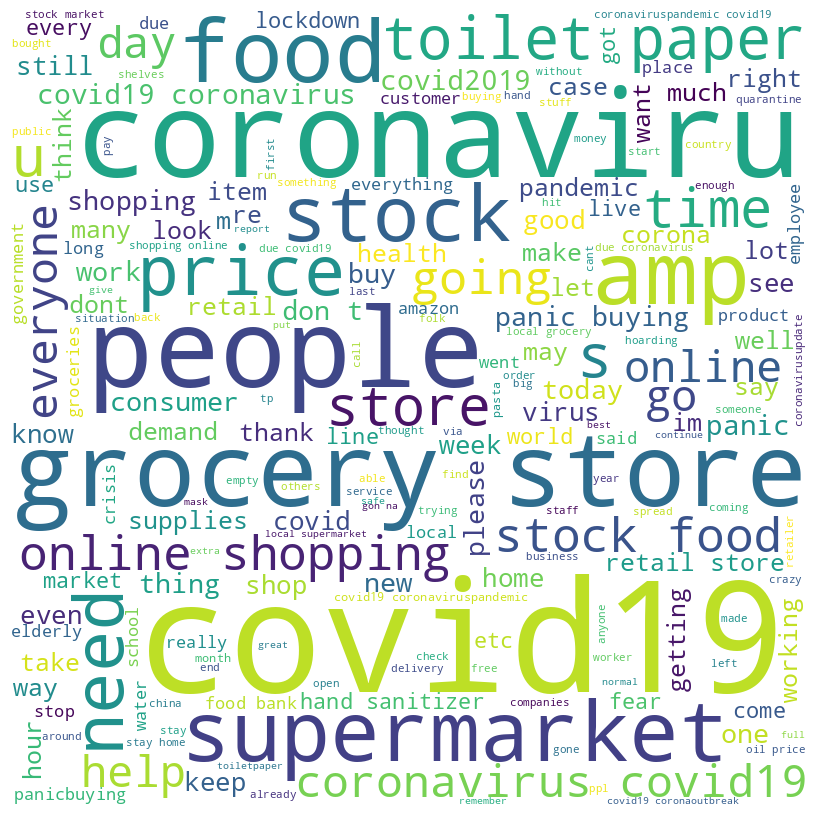

In [24]:
from wordcloud import WordCloud, STOPWORDS
# Combine all tweets into a single string
combined_text = ' '.join([' '.join(tweet_tokens) for tweet_tokens in filtered_corpus])

# Create and display the word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(combined_text) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()
